## Analysis of HUMAN Methylation Data from the Mammalian Methylation Consortium dataset (Horvath 2023)

In [1]:
# Import 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
import statsmodels.stats.multitest as multi
from fastcluster import linkage
import plotly.graph_objects as go
import pandas as pd


#### 1. Import the full dataset of Human beta coefficients from the Mammalian Methylation Consortium dataset (Horvath 2023) 

In [10]:
# Read the CSV file
methylation_data = pd.read_csv('GSE184211_datBetaNormalized.csv')

In [4]:
print(methylation_data.shape)
# 37554 CpG sites and 662 samples  

(37554, 662)


In [5]:
# Sneak peek of the data 
methylation_data.head(5)

,CGid,X203203210100_R01C01,X203203210100_R02C01,X203203210100_R03C01,X203203210100_R04C01,X203203210100_R05C01,X203203210100_R06C01,X203203210100_R01C02,X203203210100_R02C02,X203203210100_R03C02,...,X203203210013_R03C01,X203203210013_R04C01,X203203210013_R05C01,X203203210013_R06C01,X203203210013_R01C02,X203203210013_R02C02,X203203210013_R03C02,X203203210013_R04C02,X203203210013_R05C02,X203203210013_R06C02
0,cg00000165,0.101505,0.109506,0.141691,0.099335,0.119663,0.133722,0.160619,0.103879,0.113632,...,0.134059,0.111548,0.127344,0.084265,0.112711,0.098072,0.096010,0.117737,0.093164,0.184909
1,cg00001209,0.874657,0.899091,0.856218,0.896215,0.881654,0.919595,0.897742,0.895401,0.888192,...,0.857043,0.826831,0.866019,0.831738,0.852618,0.906398,0.884948,0.846944,0.924727,0.873856
2,cg00001364,0.809139,0.841104,0.768823,0.812510,0.767511,0.855345,0.825716,0.876175,0.845755,...,0.848691,0.865939,0.903710,0.920990,0.860893,0.895960,0.894021,0.896620,0.906478,0.891837
3,cg00001582,0.040719,0.042991,0.041190,0.047361,0.043020,0.043740,0.044908,0.037882,0.046859,...,0.035247,0.034831,0.039376,0.040148,0.040499,0.039100,0.040631,0.043228,0.045163,0.040598
4,cg00002920,0.415627,0.562619,0.492849,0.537996,0.646229,0.324161,0.240706,0.492182,0.404285,...,0.329255,0.315051,0.321974,0.303632,0.351651,0.405474,0.495430,0.309546,0.355513,0.082500


In [12]:
# Rename column 'CGid' to 'CpG'
methylation_data.rename(columns={'CGid': 'CpG'}, inplace=True)

In [7]:
methylation_data.head(5)

,CpG,X203203210100_R01C01,X203203210100_R02C01,X203203210100_R03C01,X203203210100_R04C01,X203203210100_R05C01,X203203210100_R06C01,X203203210100_R01C02,X203203210100_R02C02,X203203210100_R03C02,...,X203203210013_R03C01,X203203210013_R04C01,X203203210013_R05C01,X203203210013_R06C01,X203203210013_R01C02,X203203210013_R02C02,X203203210013_R03C02,X203203210013_R04C02,X203203210013_R05C02,X203203210013_R06C02
0,cg00000165,0.101505,0.109506,0.141691,0.099335,0.119663,0.133722,0.160619,0.103879,0.113632,...,0.134059,0.111548,0.127344,0.084265,0.112711,0.098072,0.096010,0.117737,0.093164,0.184909
1,cg00001209,0.874657,0.899091,0.856218,0.896215,0.881654,0.919595,0.897742,0.895401,0.888192,...,0.857043,0.826831,0.866019,0.831738,0.852618,0.906398,0.884948,0.846944,0.924727,0.873856
2,cg00001364,0.809139,0.841104,0.768823,0.812510,0.767511,0.855345,0.825716,0.876175,0.845755,...,0.848691,0.865939,0.903710,0.920990,0.860893,0.895960,0.894021,0.896620,0.906478,0.891837
3,cg00001582,0.040719,0.042991,0.041190,0.047361,0.043020,0.043740,0.044908,0.037882,0.046859,...,0.035247,0.034831,0.039376,0.040148,0.040499,0.039100,0.040631,0.043228,0.045163,0.040598
4,cg00002920,0.415627,0.562619,0.492849,0.537996,0.646229,0.324161,0.240706,0.492182,0.404285,...,0.329255,0.315051,0.321974,0.303632,0.351651,0.405474,0.495430,0.309546,0.355513,0.082500


In [8]:
# Check if there are any missing values
missing_values = methylation_data.isnull().sum().sum()
print(f'There are {missing_values} missing values.')

There are 0 missing values.


In [9]:
# Check if there are any duplicated CpG sites
duplicated_cpg = methylation_data['CpG'].duplicated().sum()
print(f'There are {duplicated_cpg} duplicated CpG sites.')

There are 0 duplicated CpG sites.


#### 2. Exploratory Analysis of the data with Heatmaps and PCA

2.1. Heatmap of the whole dataset

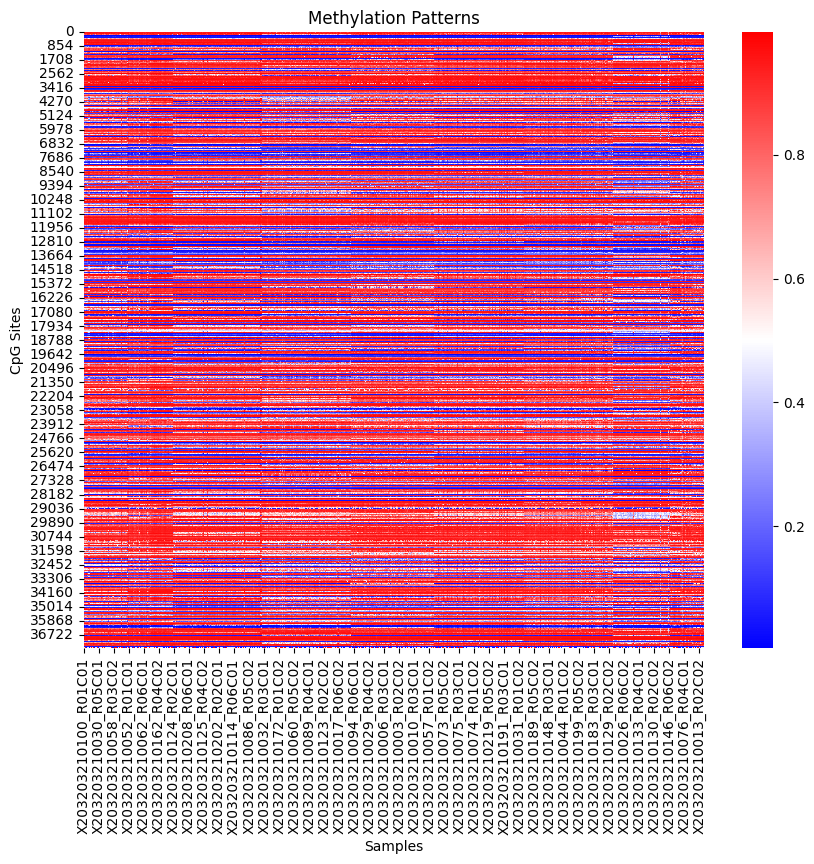

In [9]:
# Exclude the first column (CpG names) from the dataframe before plotting
methylation_data_without_names = methylation_data.iloc[:, 1:]

# Plot the heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(methylation_data_without_names, cmap='bwr') 
plt.xlabel('Samples')
plt.ylabel('CpG Sites')
plt.title('Methylation Patterns')
plt.show()

2.2. PCA of the whole dataset

In [ ]:
# # PCA of beta coefficients

# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Standardize the data
# scaler = StandardScaler()
# methylation_data_scaled = scaler.fit_transform(methylation_data_without_names)

# # PCA
# pca = PCA()
# methylation_data_pca = pca.fit_transform(methylation_data_scaled)

# # Plot the explained variance ratio
# plt.figure(figsize=(10, 8))
# plt.plot(pca.explained_variance_ratio_)
# plt.xlabel('Number of Components')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance Ratio by Number of Components')
# plt.show()

### 3. Filtering the data by the CpGs identified in the Clocks

#### 3.1. Import CpG's identified by the Clocks

In [2]:
# Import full clocks
Clock_1 = pd.read_csv('../FunctionalAnalysis/Clock_1_ordered.csv')
Clock_2 = pd.read_csv('../FunctionalAnalysis/Clock_2_ordered.csv')
Clock_3 = pd.read_csv('../FunctionalAnalysis/Clock_3_ordered.csv')
Clock_1_2_3_overlap = pd.read_csv('../FunctionalAnalysis/overlap_1_2_3_ordered.csv')
Clock_2_3_overlap = pd.read_csv('../FunctionalAnalysis/overlap_2_3_ordered.csv')

In [5]:
Clock_1.head()

,index,var,beta_clock1,CHR,bp_hg38,Gene,Gene.hg19,ENTREZID,conservationInMouse,GeneRegionID,annotation,CHR_mm10,bp_mm10,Gene_mm10
0,143,cg11728741,0.928874,8,41896469,ANK1,ANK1,286,conserved gene and region in mouse and human,ANK1_Exon,Promoter (<=1kb),8,22975146.0,Ank1
1,297,cg24352905,0.853268,5,77645452,OTP,OTP,23440,conserved gene and region in mouse and human,OTP_Promoter,Promoter (5-6kb),13,94869014.0,Otp
2,98,cg08938156,0.843749,3,147409417,LOC440982,ZIC1,440982,mapped to different gene in human and mouse,LOC440982_fiveUTR,5' UTR,9,91365746.0,Zic1
3,160,cg13058338,0.638660,12,54173598,SMUG1,SMUG1,23583,mapped to different gene in human and mouse,SMUG1_Intron,"Intron (ENST00000635234.1/23583, intron 2 of 4)",15,103146996.0,Smug1
4,316,cg26067250,0.510613,2,172085721,DLX1,DLX1,1745,mapped to different gene in human and mouse,DLX1_Exon,Promoter (<=1kb),2,71530037.0,Dlx1


In [7]:
# Create a subset of the first 100 and 200 CpG sites for each clock

Clock1_100 = Clock_1.head(100)
Clock2_100 = Clock_2.head(100)
Clock3_100 = Clock_3.head(100)
Clock1_2_3_overlap_100 = Clock_1_2_3_overlap.head(100)
Clock2_3_overlap_100 = Clock_2_3_overlap.head(100)

Clock1_200 = Clock_1.head(200)
Clock2_200 = Clock_2.head(200)
Clock3_200 = Clock_3.head(200)
Clock1_2_3_overlap_200 = Clock_1_2_3_overlap.head(200)
Clock2_3_overlap_200 = Clock_2_3_overlap.head(200)


In [8]:
# Sneak peek of the top CpGs for clock 1
print(Clock1_100.shape)
Clock1_100.head()

(100, 14)


,index,var,beta_clock1,CHR,bp_hg38,Gene,Gene.hg19,ENTREZID,conservationInMouse,GeneRegionID,annotation,CHR_mm10,bp_mm10,Gene_mm10
0,143,cg11728741,0.928874,8,41896469,ANK1,ANK1,286,conserved gene and region in mouse and human,ANK1_Exon,Promoter (<=1kb),8,22975146.0,Ank1
1,297,cg24352905,0.853268,5,77645452,OTP,OTP,23440,conserved gene and region in mouse and human,OTP_Promoter,Promoter (5-6kb),13,94869014.0,Otp
2,98,cg08938156,0.843749,3,147409417,LOC440982,ZIC1,440982,mapped to different gene in human and mouse,LOC440982_fiveUTR,5' UTR,9,91365746.0,Zic1
3,160,cg13058338,0.638660,12,54173598,SMUG1,SMUG1,23583,mapped to different gene in human and mouse,SMUG1_Intron,"Intron (ENST00000635234.1/23583, intron 2 of 4)",15,103146996.0,Smug1
4,316,cg26067250,0.510613,2,172085721,DLX1,DLX1,1745,mapped to different gene in human and mouse,DLX1_Exon,Promoter (<=1kb),2,71530037.0,Dlx1


In [21]:
# Sneak peek of the overlaps (CpG col has a different name)
print(Clock1_2_3_overlap_100.shape)
Clock1_2_3_overlap_100.head()

(100, 40)


,index_x,var_x,beta_clock1,CHR_x,bp_hg38_x,Gene,Gene.hg19_x,ENTREZID_x,conservationInMouse_x,GeneRegionID_x,...,CHR,bp_hg38,Gene.hg19,ENTREZID,conservationInMouse,GeneRegionID,annotation,CHR_mm10,bp_mm10,Gene_mm10
0,98,cg08938156,0.843749,3,147409417,LOC440982,ZIC1,440982,mapped to different gene in human and mouse,LOC440982_fiveUTR,...,3,147409417,ZIC1,440982,mapped to different gene in human and mouse,LOC440982_fiveUTR,5' UTR,9,91365746.0,Zic1
1,329,cg27201382,0.444645,11,27720483,BDNF,BDNF,627,conserved gene and region in mouse and human,BDNF_fiveUTR,...,11,27720483,BDNF,627,conserved gene and region in mouse and human,BDNF_fiveUTR,Promoter (<=1kb),2,109676257.0,Bdnf
2,144,cg11904056,0.341791,5,93583204,NR2F1-AS1,NR2F1,441094,mapped to different gene in human and mouse,NR2F1-AS1_Intron,...,5,93585317,NR2F1,441094,mapped to different gene in human and mouse,NR2F1-AS1_Exon,Promoter (<=1kb),13,78198288.0,Nr2f1
3,44,cg03820088,0.337644,7,23522229,TRA2A,TRA2A,29896,conserved gene but different region in human a...,TRA2A_fiveUTR,...,7,23522229,TRA2A,29896,conserved gene but different region in human a...,TRA2A_fiveUTR,5' UTR,6,49252905.0,Tra2a
4,58,cg04998737,0.336275,5,77645403,OTP,OTP,23440,conserved gene and region in mouse and human,OTP_Promoter,...,5,77645452,OTP,23440,conserved gene and region in mouse and human,OTP_Promoter,Promoter (5-6kb),13,94869014.0,Otp


In [12]:
# Print colnames
print(Clock1_2_3_overlap_100.columns)

Index(['index_x', 'var_x', 'beta_clock1', 'CHR_x', 'bp_hg38_x', 'Gene',
       'Gene.hg19_x', 'ENTREZID_x', 'conservationInMouse_x', 'GeneRegionID_x',
       'annotation_x', 'CHR_mm10_x', 'bp_mm10_x', 'Gene_mm10_x', 'index_y',
       'var_y', 'beta_clock2', 'CHR_y', 'bp_hg38_y', 'Gene.hg19_y',
       'ENTREZID_y', 'conservationInMouse_y', 'GeneRegionID_y', 'annotation_y',
       'CHR_mm10_y', 'bp_mm10_y', 'Gene_mm10_y', 'index', 'var', 'beta_clock3',
       'CHR', 'bp_hg38', 'Gene.hg19', 'ENTREZID', 'conservationInMouse',
       'GeneRegionID', 'annotation', 'CHR_mm10', 'bp_mm10', 'Gene_mm10'],
      dtype='object')


#### 3.2. Lists with the top 100 CpGs for each clock

In [14]:
# Make a list of the CpGs (var) for each clock 

Clock1_CpG_list = Clock_1['var'].tolist()
Clock2_CpG_list = Clock_2['var'].tolist()
Clock3_CpG_list = Clock_3['var'].tolist()
Clock1_2_3_overlap_CpG_list = Clock_1_2_3_overlap['var_x'].tolist()
Clock2_3_overlap_CpG_list = Clock_2_3_overlap['var_x'].tolist()

Clock1_100_CpG_list = Clock1_100['var'].tolist()
Clock2_100_CpG_list = Clock2_100['var'].tolist()
Clock3_100_CpG_list = Clock3_100['var'].tolist()
Clock1_2_3_overlap_100_CpG_list = Clock1_2_3_overlap_100['var_x'].tolist()
Clock2_3_overlap_100_CpG_list = Clock2_3_overlap_100['var_x'].tolist()

Clock1_200_CpG_list = Clock1_200['var'].tolist()
Clock2_200_CpG_list = Clock2_200['var'].tolist()
Clock3_200_CpG_list = Clock3_200['var'].tolist()
Clock1_2_3_overlap_200_CpG_list = Clock1_2_3_overlap_200['var_x'].tolist()
Clock2_3_overlap_200_CpG_list = Clock2_3_overlap_200['var_x'].tolist()


In [14]:
print(Clock1_100_CpG_list)

['cg11728741', 'cg24352905', 'cg08938156', 'cg13058338', 'cg26067250', 'cg27201382', 'cg00593462', 'cg09227056', 'cg11904056', 'cg03820088', 'cg04998737', 'cg08074329', 'cg17143801', 'cg04368876', 'cg05401971', 'cg16960327', 'cg09710440', 'cg03605454', 'cg16599143', 'cg22661206', 'cg18821963', 'cg15682828', 'cg23087015', 'cg12651099', 'cg12156848', 'cg09622673', 'cg22264409', 'cg11084334', 'cg15340018', 'cg23985931', 'cg08676748', 'cg03370924', 'cg01429475', 'cg12373771', 'cg25943666', 'cg00249943', 'cg14381350', 'cg26844246', 'cg23076498', 'cg16867657', 'cg25019875', 'cg09497746', 'cg04097289', 'cg02532525', 'cg17267107', 'cg05475048', 'cg10125423', 'cg12841266', 'cg15437942', 'cg25468783', 'cg12830057', 'cg04211240', 'cg15719056', 'cg01009870', 'cg18194685', 'cg26012482', 'cg05575054', 'cg27553955', 'cg03564272', 'cg00513357', 'cg24357465', 'cg19981759', 'cg26512254', 'cg03942000', 'cg03185524', 'cg14384416', 'cg24952195', 'cg07499079', 'cg10040493', 'cg25217825', 'cg16570119', 'cg18

#### 3.3. Filtering the full human methylation dataset by the top 100 CpGs

In [15]:
# Use Clock Lists to extract the CpGs from the methylation data - Resulting in tables of beta coefficients of the top 100 CpGs for each clock - MANTAIN ORDER 

Clock1_100_methylation_data = methylation_data[methylation_data['CpG'].isin(Clock1_100_CpG_list)]
Clock1_100_methylation_data = Clock1_100_methylation_data.set_index('CpG').loc[Clock1_100_CpG_list].reset_index()

In [21]:
# Use Clock Lists to extract the CpGs from the methylation data - Resulting in tables of beta coefficients of the top 100 CpGs for each clock
Clock1_methylation_data = methylation_data[methylation_data['CpG'].isin(Clock1_CpG_list)]
Clock1_methylation_data = Clock1_methylation_data.set_index('CpG').loc[Clock1_CpG_list].reset_index()
Clock2_methylation_data = methylation_data[methylation_data['CpG'].isin(Clock2_CpG_list)]
Clock2_methylation_data = Clock2_methylation_data.set_index('CpG').loc[Clock2_CpG_list].reset_index()
Clock3_methylation_data = methylation_data[methylation_data['CpG'].isin(Clock3_CpG_list)]
Clock3_methylation_data = Clock3_methylation_data.set_index('CpG').loc[Clock3_CpG_list].reset_index()
Clock1_2_3_overlap_methylation_data = methylation_data[methylation_data['CpG'].isin(Clock1_2_3_overlap_CpG_list)]
Clock1_2_3_overlap_methylation_data = Clock1_2_3_overlap_methylation_data.set_index('CpG').loc[Clock1_2_3_overlap_CpG_list].reset_index()
Clock2_3_overlap_methylation_data = methylation_data[methylation_data['CpG'].isin(Clock2_3_overlap_CpG_list)]
Clock2_3_overlap_methylation_data = Clock2_3_overlap_methylation_data.set_index('CpG').loc[Clock2_3_overlap_CpG_list].reset_index()

Clock1_methylation_data_top100 = methylation_data[methylation_data['CpG'].isin(Clock1_100_CpG_list)]
Clock1_methylation_data_top100 = Clock1_methylation_data_top100.set_index('CpG').loc[Clock1_100_CpG_list].reset_index()
Clock2_methylation_data_top100 = methylation_data[methylation_data['CpG'].isin(Clock2_100_CpG_list)]
Clock2_methylation_data_top100 = Clock2_methylation_data_top100.set_index('CpG').loc[Clock2_100_CpG_list].reset_index()
Clock3_methylation_data_top100 = methylation_data[methylation_data['CpG'].isin(Clock3_100_CpG_list)]
Clock3_methylation_data_top100 = Clock3_methylation_data_top100.set_index('CpG').loc[Clock3_100_CpG_list].reset_index()
Clock1_2_3_overlap_methylation_data_top100 = methylation_data[methylation_data['CpG'].isin(Clock1_2_3_overlap_100_CpG_list)]
Clock1_2_3_overlap_methylation_data_top100 = Clock1_2_3_overlap_methylation_data_top100.set_index('CpG').loc[Clock1_2_3_overlap_100_CpG_list].reset_index()
Clock2_3_overlap_methylation_data_top100 = methylation_data[methylation_data['CpG'].isin(Clock2_3_overlap_100_CpG_list)]
Clock2_3_overlap_methylation_data_top100 = Clock2_3_overlap_methylation_data_top100.set_index('CpG').loc[Clock2_3_overlap_100_CpG_list].reset_index()

Clock1_methylation_data_top200 = methylation_data[methylation_data['CpG'].isin(Clock1_200_CpG_list)]
Clock1_methylation_data_top200 = Clock1_methylation_data.set_index('CpG').loc[Clock1_200_CpG_list].reset_index()
Clock2_methylation_data_top200 = methylation_data[methylation_data['CpG'].isin(Clock2_200_CpG_list)]
Clock2_methylation_data_top200 = Clock2_methylation_data.set_index('CpG').loc[Clock2_200_CpG_list].reset_index()
Clock3_methylation_data_top200 = methylation_data[methylation_data['CpG'].isin(Clock3_200_CpG_list)]    
Clock3_methylation_data_top200 = Clock3_methylation_data.set_index('CpG').loc[Clock3_200_CpG_list].reset_index()
Clock1_2_3_overlap_methylation_data_top200 = methylation_data[methylation_data['CpG'].isin(Clock1_2_3_overlap_200_CpG_list)]
Clock1_2_3_overlap_methylation_data_top200 = Clock1_2_3_overlap_methylation_data.set_index('CpG').loc[Clock1_2_3_overlap_200_CpG_list].reset_index()
Clock2_3_overlap_methylation_data_top200 = methylation_data[methylation_data['CpG'].isin(Clock2_3_overlap_200_CpG_list)]
Clock2_3_overlap_methylation_data_top200 = Clock2_3_overlap_methylation_data.set_index('CpG').loc[Clock2_3_overlap_200_CpG_list].reset_index()

In [29]:
print(f'Shape of Clock1 Methylation data: {Clock1_methylation_data_top100.shape}')
print(f'Shape of Clock2 Methylation data: {Clock2_methylation_data_top100.shape}')
print(f'Shape of Clock3 Methylation data: {Clock3_methylation_data_top100.shape}')
print(f'Shape of Clock1_2_3_overlap Methylation data: {Clock1_2_3_overlap_methylation_data_top100.shape}')
print(f'Shape of Clock2_3_overlap Methylation data: {Clock2_3_overlap_methylation_data_top100.shape}')

Shape of Clock1 Methylation data: (100, 662)
Shape of Clock2 Methylation data: (100, 662)
Shape of Clock3 Methylation data: (100, 662)
Shape of Clock1_2_3_overlap Methylation data: (100, 662)
Shape of Clock2_3_overlap Methylation data: (100, 662)


In [23]:
# Save the data
Clock1_methylation_data.to_csv('././Clocks Methylation Data/Clock1_Methylation_Data.csv', index=False)
Clock2_methylation_data.to_csv('././Clocks Methylation Data/Clock2_Methylation_Data.csv', index=False)
Clock3_methylation_data.to_csv('./Clocks Methylation Data/Clock3_Methylation_Data.csv', index=False)
Clock1_2_3_overlap_methylation_data.to_csv('././Clocks Methylation Data/Clock1_2_3_Overlap_Methylation_Data.csv', index=False)
Clock2_3_overlap_methylation_data.to_csv('././Clocks Methylation Data/Clock2_3_Overlap_Methylation_Data.csv', index=False)

Clock1_methylation_data_top100.to_csv('././Clocks Methylation Data/Clock1_Methylation_Data_Top100.csv', index=False)
Clock2_methylation_data_top100.to_csv('./Clocks Methylation Data/Clock2_Methylation_Data_Top100.csv', index=False)
Clock3_methylation_data_top100.to_csv('./Clocks Methylation Data/Clock3_Methylation_Data_Top100.csv', index=False)
Clock1_2_3_overlap_methylation_data_top100.to_csv('././Clocks Methylation Data/Clock1_2_3_Overlap_Methylation_Data_Top100.csv', index=False)
Clock2_3_overlap_methylation_data_top100.to_csv('././Clocks Methylation Data/Clock2_3_Overlap_Methylation_Data_Top100.csv', index=False)

Clock1_methylation_data_top200.to_csv('././Clocks Methylation Data/Clock1_Methylation_Data_Top200.csv', index=False)
Clock2_methylation_data_top200.to_csv('./Clocks Methylation Data/Clock2_Methylation_Data_Top200.csv', index=False)
Clock3_methylation_data_top200.to_csv('./Clocks Methylation Data/Clock3_Methylation_Data_Top200.csv', index=False)
Clock1_2_3_overlap_methylation_data_top200.to_csv('././Clocks Methylation Data/Clock1_2_3_Overlap_Methylation_Data_Top200.csv', index=False)
Clock2_3_overlap_methylation_data_top200.to_csv('././Clocks Methylation Data/Clock2_3_Overlap_Methylation_Data_Top200.csv', index=False)


#### 3.4. Heatmap of the top 100 CpGs

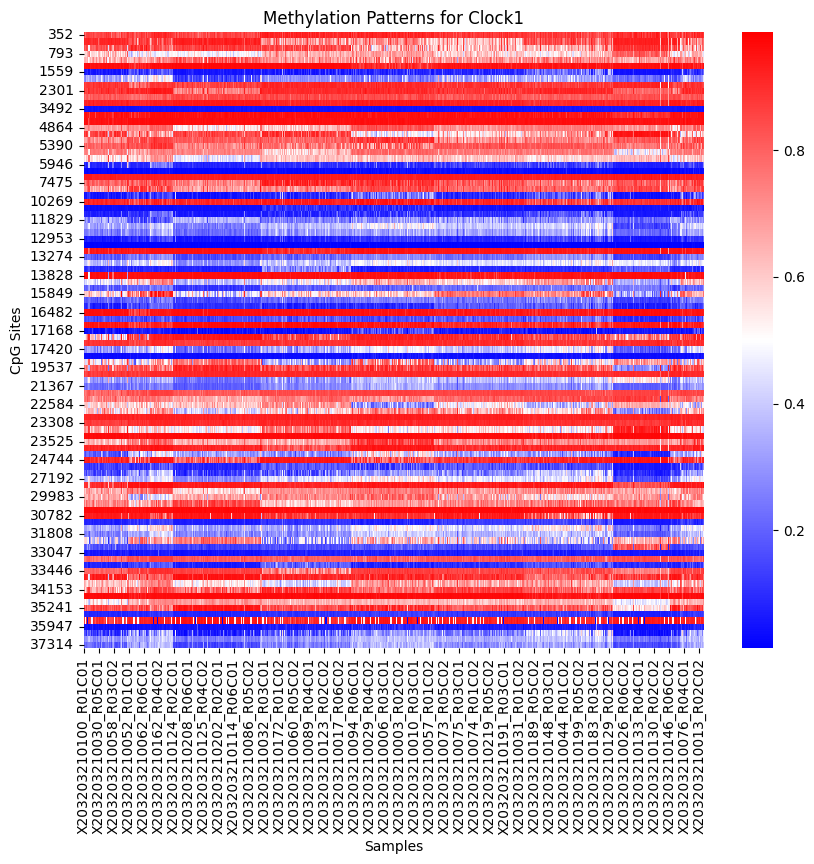

In [20]:
# Methylation Heatmap for Clock1

Clock1_methylation_data_without_names = Clock1_methylation_data_top100.iloc[:, 1:]

plt.figure(figsize=(10, 8)) 
sns.heatmap(Clock1_methylation_data_without_names, cmap='bwr')
plt.xlabel('Samples')
plt.ylabel('CpG Sites')
plt.title('Methylation Patterns for Clock1')
plt.show()

Grouped Methylation Heatmap for all Clocks

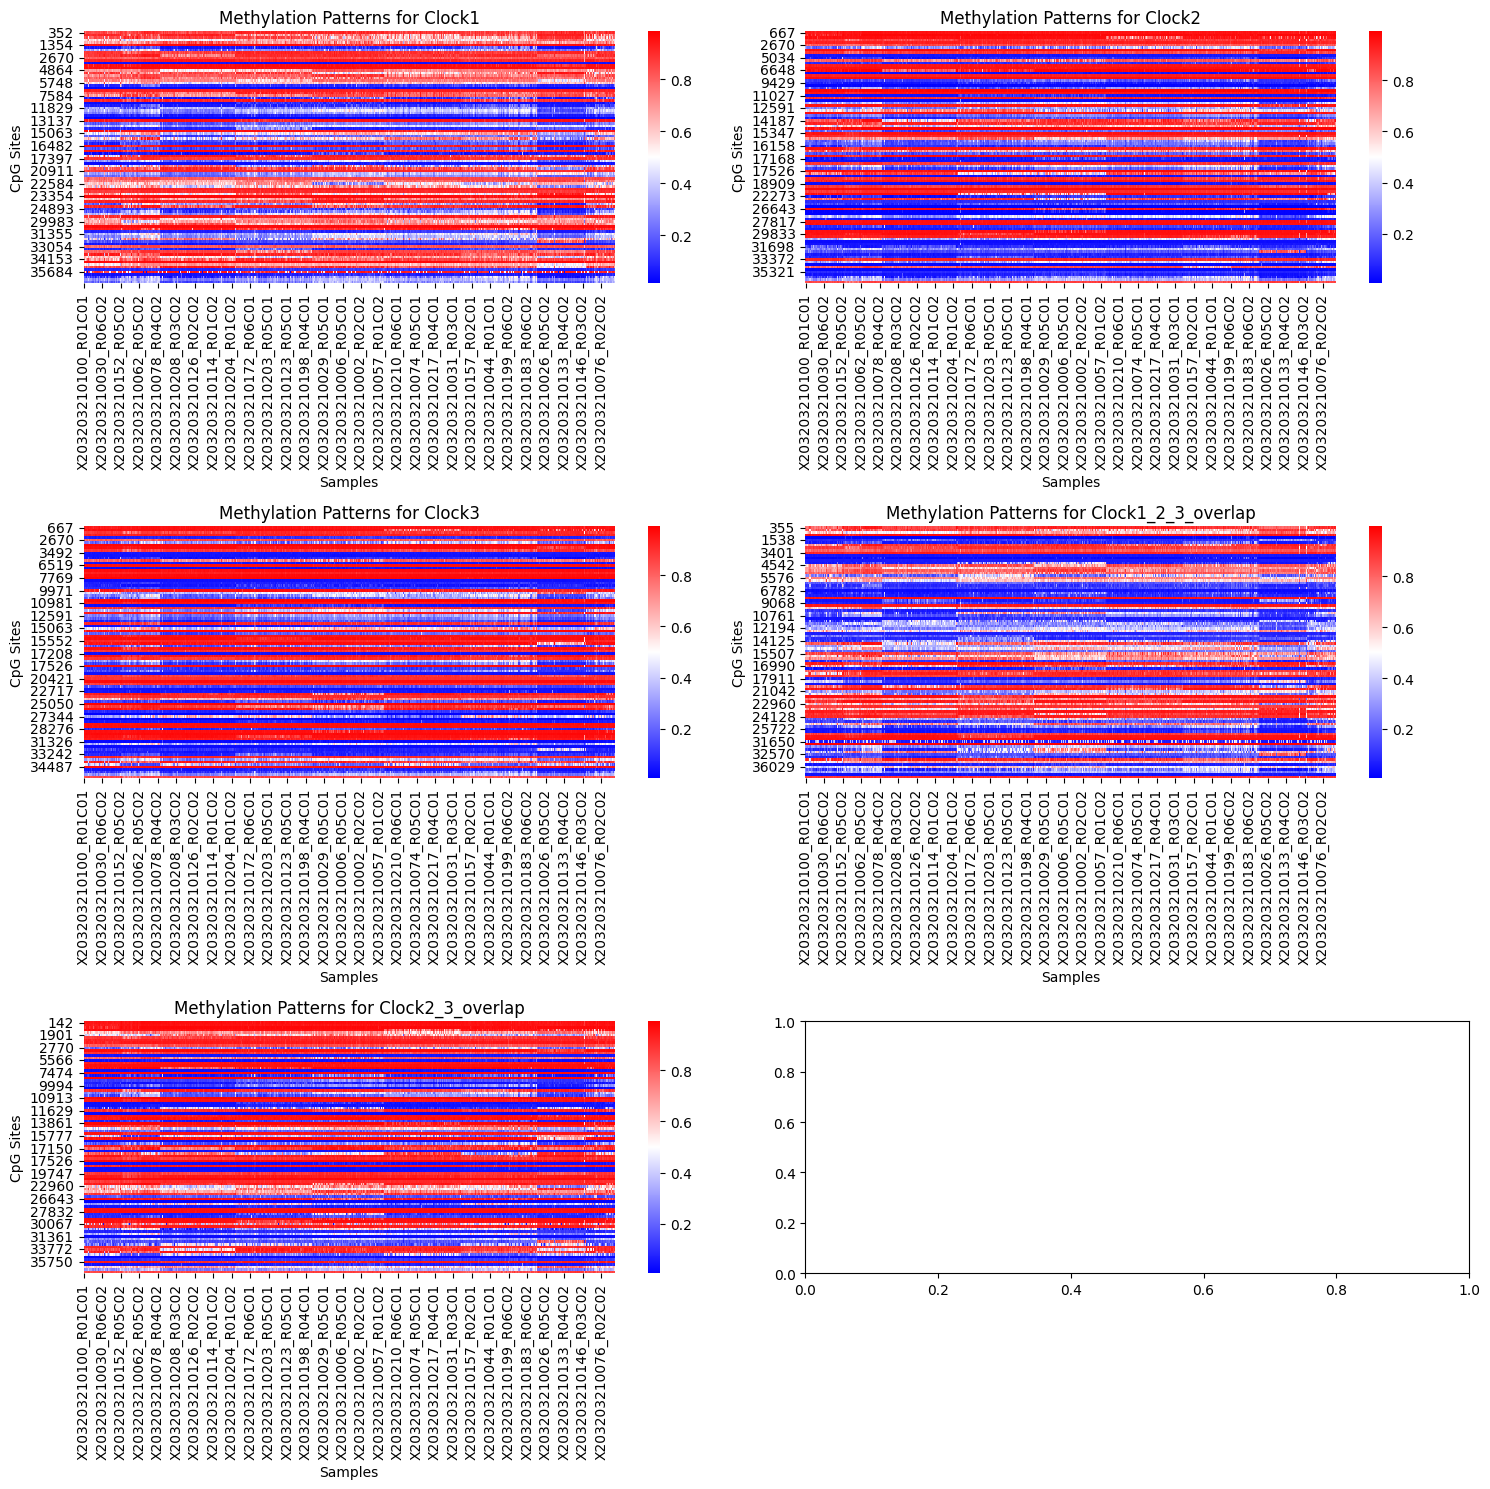

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have imported necessary libraries and defined the data as mentioned

# Create subplots for multiple heatmaps
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Methylation Heatmap for Clock1
Clock1_methylation_data_without_names = Clock1_methylation_data_top100.iloc[:, 1:]
sns.heatmap(Clock1_methylation_data_without_names, cmap='bwr', ax=axes[0, 0])
axes[0, 0].set_xlabel('Samples')
axes[0, 0].set_ylabel('CpG Sites')
axes[0, 0].set_title('Methylation Patterns for Clock1')

# Methylation Heatmap for Clock2
Clock2_methylation_data_without_names = Clock2_methylation_data_top100.iloc[:, 1:]
sns.heatmap(Clock2_methylation_data_without_names, cmap='bwr', ax=axes[0, 1])
axes[0, 1].set_xlabel('Samples')
axes[0, 1].set_ylabel('CpG Sites')
axes[0, 1].set_title('Methylation Patterns for Clock2')

# Methylation Heatmap for Clock3
Clock3_methylation_data_without_names = Clock3_methylation_data.iloc[:, 1:]
sns.heatmap(Clock3_methylation_data_without_names, cmap='bwr', ax=axes[1, 0])
axes[1, 0].set_xlabel('Samples')
axes[1, 0].set_ylabel('CpG Sites')
axes[1, 0].set_title('Methylation Patterns for Clock3')

# Methylation Heatmap for Clock1_2_3_overlap
Clock1_2_3_overlap_methylation_data_without_names = Clock1_2_3_overlap_methylation_data_top100.iloc[:, 1:]
sns.heatmap(Clock1_2_3_overlap_methylation_data_without_names, cmap='bwr', ax=axes[1, 1])
axes[1, 1].set_xlabel('Samples')
axes[1, 1].set_ylabel('CpG Sites')
axes[1, 1].set_title('Methylation Patterns for Clock1_2_3_overlap')

# Methylation Heatmap for Clock2_3_overlap
Clock2_3_overlap_methylation_data_without_names = Clock2_3_overlap_methylation_data_top100.iloc[:, 1:]
sns.heatmap(Clock2_3_overlap_methylation_data_without_names, cmap='bwr', ax=axes[2, 0])
axes[2, 0].set_xlabel('Samples')
axes[2, 0].set_ylabel('CpG Sites')
axes[2, 0].set_title('Methylation Patterns for Clock2_3_overlap')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### 4. Adding metadata information about each sample

#### 4.1. Scrapping metadata from GEO

In [178]:
# Making a list with the sample names (without the first column - CpG names)   
sample_names = methylation_data.columns[1:]

In [180]:
# Scraping metadata for all human samples in the dataset

metadata_human_samples = []

for page_num in range(1, 3):
    try:
        url = f'https://www.ncbi.nlm.nih.gov/geo/browse/?view=samples&display=1000&series=184211&page={page_num}'
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        html_text = soup.get_text()

        for sample_name in sample_names:
            search_term = sample_name.split('X')[1]
            pattern = r'\b(GSM\d+)\s+Sample\d+\.Human\.{}\b'.format(re.escape(search_term))
            match = re.search(pattern, html_text)
            
            if match:
                geo_id = match.group(1)
                url = f'https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc={geo_id}'
                response = requests.get(url)
                response.raise_for_status()
                soup = BeautifulSoup(response.content, 'html.parser')
                
                description_tag = soup.find('td', string=lambda text: text and 'Description' in text)
                description = description_tag.find_next('td').text.strip()
                characteristics_tag = soup.find('td', string=lambda text: text and 'Characteristics' in text)
                characteristics = characteristics_tag.find_next('td').text.strip()
                
                tissue = description.split('tissue=')[1].split(' ')[0]
                age = characteristics.split('age: ')[1].split('confidenceinageestimate')[0].strip()
                sex = characteristics.split('Sex: ')[1].split('\n')[0]
                
                metadata_human_samples.append([sample_name, geo_id, tissue, age, sex])
    
    except Exception as e:
        print(f"Error processing page {page_num}: {e}")

# Check if metadata list is empty
if not metadata_human_samples:
    print("No samples found.")
else:
    # Create a pandas DataFrame from the metadata list
    human_metadata_df = pd.DataFrame(metadata_human_samples, columns=['Sample', 'GEO_ID', 'Tissue', 'Age', 'Sex'])
    # Print the DataFrame
    # print(metadata_df)

# Check for missing samples
found_samples = human_metadata_df['Sample'].tolist() if not human_metadata_df.empty else []
missing_samples = [sample_name for sample_name in sample_names if sample_name not in found_samples]

# Print counts of samples found and not found
print("Total samples:", len(sample_names))
print("Samples found:", len(found_samples))
print("Samples not found:", len(missing_samples))
print('List of Samples not found:', missing_samples)

Total samples: 661
Samples found: 661
Samples not found: 0
List of Samples not found: []


In [23]:
# Sneak peek of the metadata
human_metadata_df.head(5)

,Sample,GEO_ID,Tissue,Age,Sex,Age Group
0,X203203210100_R01C01,GSM5580349,Adipose,50,Male,30-60
1,X203203210100_R02C01,GSM5580350,Adipose,44,Female,30-60
2,X203203210100_R03C01,GSM5580351,Adipose,52,Female,30-60
3,X203203210100_R04C01,GSM5580352,Adipose,62,Female,60-90
4,X203203210100_R05C01,GSM5580353,Adipose,65,Male,60-90


In [24]:
# Shape of the human metadata dataframe
human_metadata_df.shape

(661, 6)

Check the number of unique tissues present in the metadata

In [25]:
# Check the number of unique tissues
unique_tissues = human_metadata_df['Tissue'].nunique()
print(f'Unique tissue types in the metadata: {unique_tissues}')

Unique tissue types in the metadata: 11


In [26]:
# How many samples are there for each tissue type?
tissue_counts = human_metadata_df['Tissue'].value_counts()
tissue_counts


Tissue
Lung          113
Heart          97
Kidney         97
Liver          97
Spleen         62
Adipose        57
Muscle         57
Blood          32
LymphNode      27
BoneMarrow     20
Pituitary       2
Name: count, dtype: int64

Check the range of ages and decide if I can split the ages into groups (possibly less than 30 and more than 30)

In [27]:
# Check the min ad max age
min_age = human_metadata_df['Age'].min()
max_age = human_metadata_df['Age'].max()
print(f'Minimum age: {min_age}')
print(f'Maximum age: {max_age}')

Minimum age: 26
Maximum age: 91


In [29]:
# Proportion of samples for which ages is less than 30
age_less_than_30 = human_metadata_df
age_less_than_30['Age'] = pd.to_numeric(age_less_than_30['Age'], errors='coerce')
age_less_than_30 = age_less_than_30[age_less_than_30['Age'] < 30]
proportion_age_less_than_30 = len(age_less_than_30) / len(human_metadata_df)
print(f'Number of samples for which ages is less than 30: {len(age_less_than_30)}')
print(f'Proportion of samples with age less than 30: {proportion_age_less_than_30}')

Number of samples for which ages is less than 30: 13
Proportion of samples with age less than 30: 0.019667170953101363


In [30]:
# Separate the data into age groups (0-30, 30-60, 60-90, 90+)
age_groups = []

for age in human_metadata_df['Age']:
    if age < 30:
        age_group = '0-30'
    elif age < 60:
        age_group = '30-60'
    elif age < 90:
        age_group = '60-90'
    else:
        age_group = '90+'
    age_groups.append(age_group)

# Add the age groups to the metadata DataFrame
human_metadata_df['Age Group'] = age_groups

# Check the number of samples in each age group
age_group_counts = human_metadata_df
age_group_counts = age_group_counts.groupby('Age Group').size()
print(age_group_counts)

Age Group
0-30      13
30-60    356
60-90    289
90+        3
dtype: int64


In [32]:
# Add age group to the metadata
human_metadata_df['Age Group'] = age_groups
human_metadata_df.head(5)

,Sample,GEO_ID,Tissue,Age,Sex,Age Group
0,X203203210100_R01C01,GSM5580349,Adipose,50,Male,30-60
1,X203203210100_R02C01,GSM5580350,Adipose,44,Female,30-60
2,X203203210100_R03C01,GSM5580351,Adipose,52,Female,30-60
3,X203203210100_R04C01,GSM5580352,Adipose,62,Female,60-90
4,X203203210100_R05C01,GSM5580353,Adipose,65,Male,60-90


In [33]:
# Save the metadata to a CSV file
human_metadata_df.to_csv('human_metadata_184211.csv', index=False)

In [37]:
# Import back if needed (so we don't have to scrape again)
human_metadata_df = pd.read_csv('human_metadata_184211.csv')

In [34]:
methylation_data.head(5)

,CpG,X203203210100_R01C01,X203203210100_R02C01,X203203210100_R03C01,X203203210100_R04C01,X203203210100_R05C01,X203203210100_R06C01,X203203210100_R01C02,X203203210100_R02C02,X203203210100_R03C02,...,X203203210013_R03C01,X203203210013_R04C01,X203203210013_R05C01,X203203210013_R06C01,X203203210013_R01C02,X203203210013_R02C02,X203203210013_R03C02,X203203210013_R04C02,X203203210013_R05C02,X203203210013_R06C02
0,cg00000165,0.101505,0.109506,0.141691,0.099335,0.119663,0.133722,0.160619,0.103879,0.113632,...,0.134059,0.111548,0.127344,0.084265,0.112711,0.098072,0.096010,0.117737,0.093164,0.184909
1,cg00001209,0.874657,0.899091,0.856218,0.896215,0.881654,0.919595,0.897742,0.895401,0.888192,...,0.857043,0.826831,0.866019,0.831738,0.852618,0.906398,0.884948,0.846944,0.924727,0.873856
2,cg00001364,0.809139,0.841104,0.768823,0.812510,0.767511,0.855345,0.825716,0.876175,0.845755,...,0.848691,0.865939,0.903710,0.920990,0.860893,0.895960,0.894021,0.896620,0.906478,0.891837
3,cg00001582,0.040719,0.042991,0.041190,0.047361,0.043020,0.043740,0.044908,0.037882,0.046859,...,0.035247,0.034831,0.039376,0.040148,0.040499,0.039100,0.040631,0.043228,0.045163,0.040598
4,cg00002920,0.415627,0.562619,0.492849,0.537996,0.646229,0.324161,0.240706,0.492182,0.404285,...,0.329255,0.315051,0.321974,0.303632,0.351651,0.405474,0.495430,0.309546,0.355513,0.082500


In [35]:
human_metadata_df.head(5)

,Sample,GEO_ID,Tissue,Age,Sex,Age Group
0,X203203210100_R01C01,GSM5580349,Adipose,50,Male,30-60
1,X203203210100_R02C01,GSM5580350,Adipose,44,Female,30-60
2,X203203210100_R03C01,GSM5580351,Adipose,52,Female,30-60
3,X203203210100_R04C01,GSM5580352,Adipose,62,Female,60-90
4,X203203210100_R05C01,GSM5580353,Adipose,65,Male,60-90


### 5. Heatmaps and PCAs 

Heatmaps of methylation grouped by tissue were done in R and are available in folder "Heatmaps" withit the current directory.

### 6. Differential Methylation Analysis with metadata

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
import statsmodels.stats.multitest as multi

# Load the merged data if needed
human_merged_data = pd.read_csv('human_merged_data_184211.csv')

# Group the data by tissue
tissue_groups = human_merged_data.groupby('Tissue')

# Initialize a dictionary to store p-values for each CpG site
p_values = {}

# Perform a statistical test (e.g., t-test) for each CpG site
for cpg_site, data in human_merged_data.iloc[:, 6:].items():  # Iterate over CpG sites (excluding non-numeric columns)
    p_values[cpg_site] = ttest_ind(*[group[cpg_site] for _, group in tissue_groups])[1]

# Multiple testing correction
corrected_p_values = multi.multipletests(list(p_values.values()), method='fdr_bh')[1]

# Identify differentially methylated CpG sites based on adjusted p-values
differentially_methylated_cpgs = human_merged_data.columns[6:][corrected_p_values < 0.05]

# Print or visualize the results as needed
print("Number of differentially methylated CpG sites:", len(differentially_methylated_cpgs))
print("Differentially methylated CpG sites:", differentially_methylated_cpgs)


### 7. Statistical Analysis

In [222]:
# Perform t-test for each CpG site between age groups - All data

# Import the necessary libraries
import pandas as pd
from scipy import stats
import statsmodels.stats.multitest as multi

# Load the merged data if needed
human_merged_data = pd.read_csv('human_merged_data_184211.csv')

# Create a list to store the results
t_test_results = []

# Iterate over each CpG site
for cpg_site in human_merged_data.columns[6:]:
    # Perform t-test between age groups
    t_test_result = stats.ttest_ind(
        human_merged_data[human_merged_data['Age Group'] == '0-30'][cpg_site],
        human_merged_data[human_merged_data['Age Group'] == '30-60'][cpg_site]
    )
    # Store the results
    t_test_results.append([cpg_site, t_test_result.pvalue])

# Create a DataFrame from the results
t_test_results_df = pd.DataFrame(t_test_results, columns=['CpG', 'P-Value'])

# Perform multiple testing correction
t_test_results_df['FDR'] = multi.fdrcorrection(t_test_results_df['P-Value'])[1]

# Filter significant CpG sites
significant_cpg_sites = t_test_results_df[t_test_results_df['FDR'] < 0.05]

# Check the number of significant CpG sites
print(f'Number of significant CpG sites: {len(significant_cpg_sites)}')

# Save the results to a CSV file    
t_test_results_df.to_csv('t_test_results_184211.csv', index=False)

# Save the significant CpG sites to a CSV file
significant_cpg_sites.to_csv('significant_cpg_sites_184211.csv', index=False)


Number of significant CpG sites: 103


In [ ]:
import pandas as pd
from scipy import stats
import statsmodels.stats.multitest as multi
import matplotlib.pyplot as plt

# Load the merged data if needed
human_merged_data = pd.read_csv('human_merged_data_184211.csv')

# Assuming 'methylation_data' contains methylation levels and 'metadata' contains group information

# Perform statistical testing (e.g., t-test) for differential methylation
results = {}
for group, group_data in metadata.groupby('Group'):
    group_methylation = methylation_data[group_data.index]
    p_values = stats.ttest_ind(group_methylation[group_data['Group'] == 'Group1'], 
                               group_methylation[group_data['Group'] == 'Group2']).pvalue
    results[group] = pd.Series(p_values, index=methylation_data.index)

# Multiple testing correction
corrected_p_values = {}
for group, p_values in results.items():
    corrected_p_values[group] = multi.multipletests(p_values, method='fdr_bh')[1]

# Visualize the results
# For example, you can create a volcano plot
plt.figure(figsize=(8, 6))
for group, p_values in corrected_p_values.items():
    plt.scatter(-1 * (methylation_data.mean(axis=1, skipna=True)), -1 * (p_values), label=group)
plt.xlabel('Mean Methylation Difference')
plt.ylabel('-log10(p-value)')
plt.legend()
plt.title('Volcano Plot of Differential Methylation')
plt.show()


# TO DO:
# find the average of each Cpg in the full dataset
# find the average of each Cpg in the top 100 CpGs dataset
# compare the averages
